# Multilayer Perceptrons for Multiclass Classification (Exercise)

## The Data

We will be using the Glass Identification dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/):

https://archive.ics.uci.edu/ml/datasets/Glass+Identification

**Information**

From USA Forensic Science Service, 5 types of glass defined in terms of their oxide content (i.e. Na, Fe, K, etc).
The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence... if it is correctly identified!

**Attributes**

1. RI: refractive index
2. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass: (class attribute)
    - 1. building windows
    - 2. vehicle windows
    - 3. containers
    - 4. tableware
    - 5. headlamps

## Table of Contents
- ### [Python libraries](#libraries)
- ### [Data Exploration and Feature Engineering](#exploration)
    - #### [Read the data](#read)
    - #### [Descriptive statistics](#statistics)
    - #### [Class balance](#balance)
    - #### [Correlations](#correlation)
    - #### [Remove outliers](#outliers)
- ### [Label and One-Hot encoding](#one-hot)
    - #### [Create the `X` and `y` variables](#variables)
    - #### [Encode target labels](#encoders)
- ### [Split the Data](#split)
- ### [Normalize the Data](#normalize)
- ### [Create the Model](#model)
- ### [Train the Model](#training)
    - #### [Choosing too many epochs and overfit](#overfit)
    - #### [Early Stopping](#early_stop)
- ### [Evaluate the Model](#evaluation)
- ### [Predictions](#predictions)

<a id='libraries'></a>
## Python libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id='exploration'></a>
## Data Exploration and Feature Engineering

<a id='read'></a>
### Read the data

In [3]:
df = pd.read_csv('../../Data/glass.csv').drop(columns='Unnamed: 0')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows


In [6]:
glass_types = {"building_windows": 1,
 "vehicle_windows": 2,
 "containers": 3,
 "tableware": 4,
 "headlamps": 5}

df['glass_type_id'] = df['glass_type'].apply(lambda x: glass_types[x]) 

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type,glass_type_id
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows,1


<a id='statistics'></a>
### Descriptive statistics
**TASK: Show the descriptive statistics of each column.**

In [ ]:
# CODE HERE

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
glass_type_id,214.0,1.869159,1.457273,1.00000,1.000000,1.00000,2.000000,5.00000


<a id='balance'></a>
### Class balance
**TASK: Check if the classes are balanced. Create a countplot as shown below.**

In [ ]:
# CODE HERE

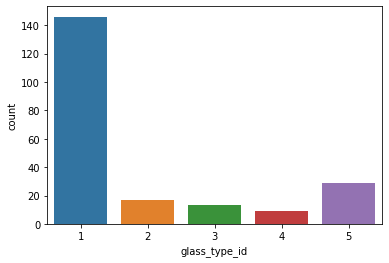

<a id='correlation'></a>
### Correlations
**TASK: Show the correlation between different attributes. Create a heatmap of the pairwise correlation of columns.**

In [ ]:
# CODE HERE

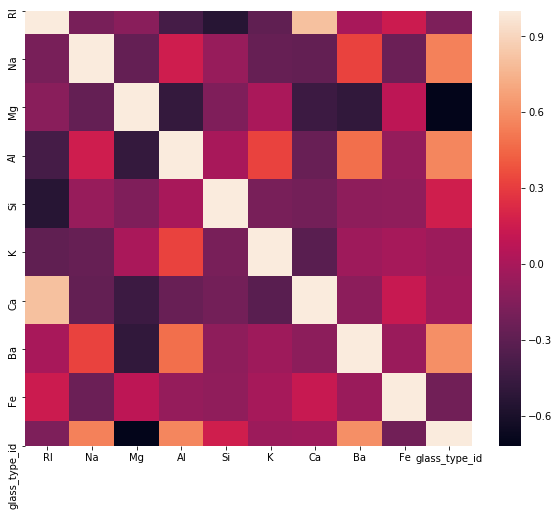

**TASK: Create a bar plot showing the correlation of the numeric attributes to the new `glass_type_id` column.**

In [ ]:
# CODE HERE

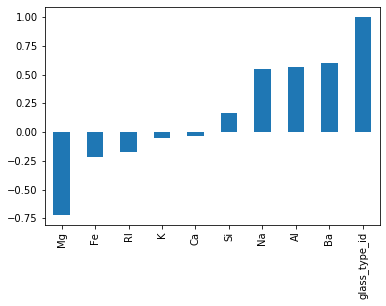

<a id='outliers'></a>
### Remove outliers

Seaborn uses [inter-quartile range](https://en.wikipedia.org/wiki/Interquartile_range) to detect the outliers. What we need to do is to reproduce the same function in the column you want to drop the outliers. We can do that by using the next function.

In [13]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    
    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
    
    return df.loc[filter]

#### Refractive index

**TASK: Create a boxplot showing the relationship between the `glass_type_id` and the `RI` columns.**

In [ ]:
# CODE HERE

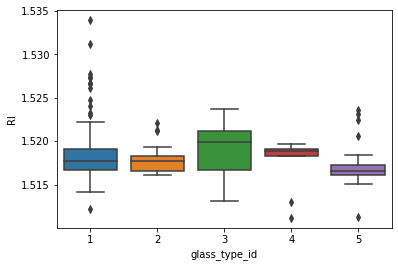

**TASK: Remove the outliers using the `remove_outliers` function and create again the boxplot.**

In [ ]:
# CODE HERE

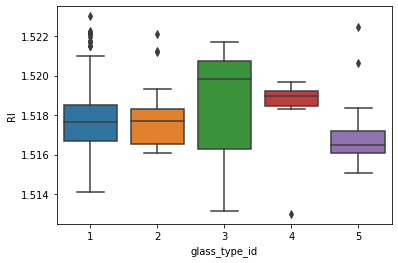

#### Potassium
**TASK: Create a boxplot showing the relationship between the `glass_type_id` and the `K` columns.**

In [ ]:
# CODE HERE

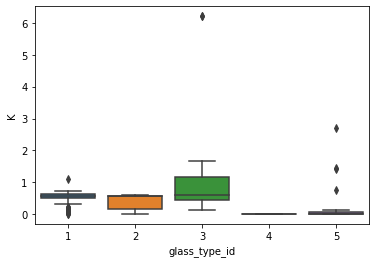

**TASK: Remove the outliers using the `remove_outliers` function and create again the boxplot.**

In [ ]:
# CODE HERE

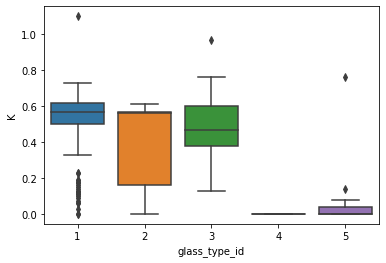

<a id='one-hot'></a>
## Label and One-Hot encoding
For multiclass classification we have to represent categorical data in the form of binary vectors.

<a id='variables'></a>
### Create the `X` and `y` variables
**TASK: Create the `X` and `y` variables by taking the `.values` of the numerical features and labels, respectively. Take as labels the `glass_type` column.**

In [ ]:
# CODE HERE

**TASK: Display the shapes of the `X` and `y` variables and the first 5 labels.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(191, 9)

(191,)

array(['building_windows', 'building_windows', 'building_windows',
       'building_windows', 'building_windows'], dtype=object)

<a id='encoders'></a>
### Encode target labels

**TASK: Import [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) form `sklearn`.**

In [ ]:
# CODE HERE

#### Label Encoder

**TASK: Use a `LabelEncoder` to encode target labels in `y` with value between `0` and `n_classes-1`. Display the shape of the new `y` variable and the first 5 values.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(191,)

array([0, 0, 0, 0, 0])

#### One-Hot Encoder

**TASK: Use a `OneHotEncoder` to encode the new categorical features of `y` as a one-hot numeric array. Display the shape of the new `y` variable and the first 5 values.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(191, 5)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

<a id='split'></a>
## Split the Data

**TASK: Import [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) form `sklearn`.**

In [ ]:
# CODE HERE

**TASK: Perform a train/test split with `test_size=0.25` and a `random_state=42`. Display the shapes of the `X_train` and `y_train` variables.**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

(143, 9)

(143, 5)

<a id='normalize'></a>
## Normalize the Data

**TASK: Import [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) form `sklearn`.**

In [ ]:
# CODE HERE

**TASK: Use a `MinMaxScaler` to normalize the `X_train` and `X_test` values.**

In [ ]:
# CODE HERE

<a id='model'></a>
## Create the Model

**TASK: Import [`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) model and [`Dense`](https://keras.io/api/layers/core_layers/dense/) layer form `tensorflow.keras`.**

In [ ]:
# CODE HERE

**TASK: Build a sequential model with a dense hidden layer of 10 neurons and a dense output layer of 5 neurons. As we are dealing with a multiclass classification task use the [`softmax`](https://en.wikipedia.org/wiki/Softmax_function) activation function in the output layer and the `categorical_crossentropy` loss. Add also the `accuracy` as an [additional metric](https://keras.io/api/metrics/).**

In [ ]:
# CODE HERE

<a id='training'></a>
## Train the Model

<a id='overfit'></a>
### Choosing too many epochs and overfit

**TASK: Train the model for 2000 epochs. Don't forget to include the validation data.**

In [ ]:
# CODE HERE

#### Check if the model overfits:

**TASK: Plot the training and validation loss.**

In [ ]:
# CODE HERE

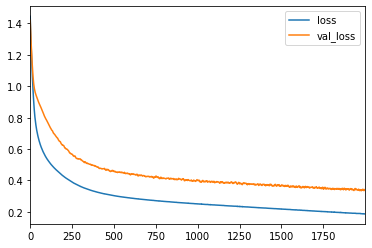

**TASK: Plot the training and validation accuracy.**

In [ ]:
# CODE HERE

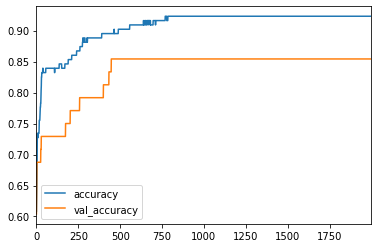

<a id='early_stop'></a>
### Early Stopping

Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

**TASK: Import [`EarlyStopping`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback form `tensorflow.keras`.**

In [ ]:
# CODE HERE

**TASK: Create the `EarlyStopping` callback.**

In [ ]:
# CODE HERE

**TASK: Train the model for 2000 epochs with the `EarlyStopping` callback.**

In [69]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='softmax'))

# For a binary classification problem
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy']) 

In [ ]:
# CODE HERE

**TASK: Plot the training and validation loss.**

In [ ]:
# CODE HERE

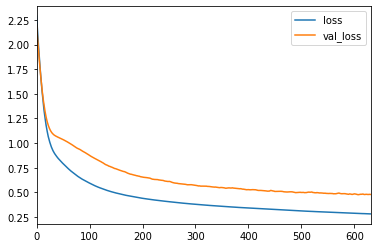

**TASK: Plot the training and validation accuracy.**

In [ ]:
# CODE HERE

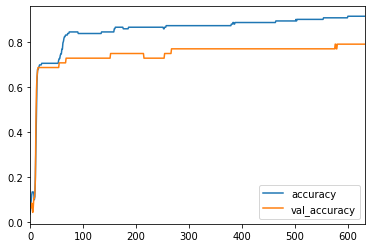

**TASK: OPTIONAL: Save your model.**

In [ ]:
# CODE HERE

<a id='evaluation'></a>
## Evaluate the Model
Check common classification metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

**TASK: Create predictions from the `X_test` dataset and display a `classification_report` and `confusion_matrix` for the `X_test` dataset. Notice that the predictions are not one-hot encoded**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

**[Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)**

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        33
           1       0.75      0.75      0.75         4
           2       0.67      1.00      0.80         2
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         6

    accuracy                           0.79        48
   macro avg       0.64      0.61      0.59        48
weighted avg       0.70      0.79      0.73        48



/Users/ikersanchez/anaconda3/envs/py37tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)**

[[32  1  0  0  0]
 [ 1  3  0  0  0]
 [ 0  0  2  0  0]
 [ 1  0  1  1  0]
 [ 6  0  0  0  0]]


<a id='predictions'></a>
## Predictions

**TASK: Predict the glass type of the last value in the `DataFrame`. Did the prediction match the actual result?**

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

True glass type: headlamps


Predicted glass type: headlamps
